In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import six
import os

from IPython.display import display 
import pysptools.spectro as spectro

In [2]:
satellites = [
    'landsat',
    'desis',
    'sentinel2'
]

sentinel2_bands = {
    'B1': [432.3, 452.3],
    'B2': [459.6, 524.6],
    'B3': [541.5, 576.5],
    'B4': [650, 680],
    'B5': [696.3, 711.3],
    'B6': [731.6, 746.6],
    'B7': [769.7, 789.7],
    'B8': [775.5, 890.5],
    'B8A': [854, 874],
    'B9': [933.2, 953.2],
    'B10': [1361.9, 1391.9],
    'B11': [1565.4, 1655.4],
    'B12': [2112.4, 2292.4]
}

#####################################################################

for satellite in satellites:

    # Loading data
    #####################################################################

    path_soil_data = os.path.abspath(f'../data/satellite_data/{satellite}/satellite_{satellite}.csv')
    
#     path_soil_data = os.path.abspath(
#         "snap/sentinel2a_band_data.csv"
#     )

    soil_nir_data = pd.read_csv(path_soil_data, sep = ";")
  
    soil_properties = ['lat','lon','X', 'Y']
    non_spectral_columns = list(set(soil_properties))

    spectral_data = soil_nir_data.drop(non_spectral_columns, axis=1).copy()
    print(spectral_data.shape)
    spectral_data_sorted = spectral_data.copy()
    print(spectral_data_sorted.columns)
    spectral_data_sorted_cols = [(i, np.mean(sentinel2_bands[i])) for i in spectral_data_sorted.columns]
    print(spectral_data_sorted_cols)
    spectral_data_sorted_cols.sort(key=lambda x: x[1])
    spectral_data_sorted_cols = [i[0] for i in spectral_data_sorted_cols]
    spectral_data_sorted = spectral_data_sorted[spectral_data_sorted_cols]
    
    spectral_data_sorted = spectral_data_sorted[~(spectral_data_sorted['B8'] < spectral_data_sorted['B11']) ]
    print(satellite)
    print(spectral_data_sorted.shape)
    display(spectral_data_sorted.head())
    
    print(spectral_data_sorted_cols)
    spectral_data_sorted.T[spectral_data_sorted.T.columns].plot(
        title=f'Firma espectral {satellite}',
        xlabel='Longitud de onda',
        ylabel='Reflectancia',
        fontsize=10,
        grid=True,
        legend=False,
        figsize=(14, 5.5)
    )
#     spectral_data_sorted.T[spectral_data_sorted.T.columns].apply(lambda x: 1-x).plot(
#         title=f'1 - firma espectral {satellite}',
#         xlabel='Longitud de onda',
#         ylabel='Reflectancia',
#         fontsize=10,
#         grid=True,
#         legend=False,
#         figsize=(14, 5.5)
#     )
    plt.show()
    

KeyError: "['Y' 'lat' 'lon' 'X'] not found in axis"

### Continuum removal

In [ ]:
spectral_data_sorted

In [2]:
array = spectral_data_sorted.apply(lambda x: 1.5-x).loc[0].values.tolist()
wavelenght = [
    float(i.split('_')[-1])
    for i in spectral_data_sorted.loc[0].index
]

print(f"array: {array}, len: {len(array)}")
print(f"wavelenght: {wavelenght}, len: {len(wavelenght)}")

NameError: name 'spectral_data_sorted' is not defined

In [27]:
spectrum = spectro.convex_hull_removal(array, wavelenght)
print(f"continuum removal: {spectrum[0]}")
print(f"wavelenght: {spectrum[1]}")
print(f"convex hull: {spectrum[2]}")

continuum removal: [1.0, 0.9476587463412284, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
wavelenght: [442.3, 559.0, 665.0, 703.8, 739.1, 779.7, 833.0, 864.0, 943.2, 1376.9, 1610.4, 2202.4]
convex hull: [0.6588529666666667, 0.9104606000000001, 1.0446781666666667, 1.08013065, 1.1087514, 1.12889975, 1.1458574384615385, 1.1530286, 1.1705792333333334, 1.2525675, 1.26629911, 1.1870320952380953]


[]

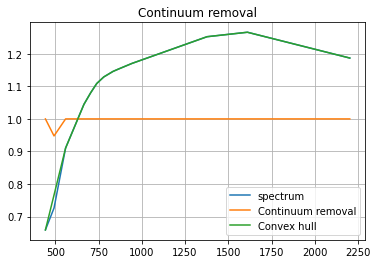

In [29]:
plt.title('Continuum removal')
plt.plot(wavelenght, array, label='spectrum')
plt.plot(wavelenght, spectrum[0], label='Continuum removal')
plt.plot(spectrum[1], spectrum[2], label='Convex hull')
plt.grid()
plt.legend()
plt.plot()